<a href="https://colab.research.google.com/github/VivianKingasia/Time-Series-Modeling-Forecasting-Zillow-Real-Estate-Prices/blob/main/Time_Series_Modeling_Forecasting_Zillow_Real_Estate_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis- Forecasting Zillow Real Estate Prices**

### Authors

 - Keith Maina
 - Vivian Kingasia
 - Ann Maureen
 - Brian Kigen
 - Charity Gakuru
 - Hannah Mutua
 - Mercy Ngila
 - Steve Troy

# 1. Introduction

##  1.1. Business Understanding

### 1.1.1. Introduction
In 2021, the real estate industry in the United States was valued at USD 3.69 trillion and was expected to experience a 5.2% compound interest growth for the period between 2022 and 2030. This potential predicted growth of the industry, coupled with rising population rates in the US create a huge lucrative opportunity potential for real estate investors to make huge profits provided they <b>manage risk</b> and <b>make the right investments</b>.<br>
According to <a href= 'https://www.peoplescapitalgroup.com/average-roi-real-estate/'>People's Capital Group</a>, residential properties have an average annual return of 10.6% and commercial properties have a 9.5% average return.

### 1.1.2. Problem Statement
The stakeholder in this project is a real estate investment firm that is looking to construct residential homes in top five locations in the US that would provide a high return on their investment. This project therefore is a time series analysis on a Zillow dataset on various locations around the United States.<br><br>

The project will involve analyzing the house sale prices from 1996 to 2018 to determine the top five locations with the highest Return on Investment (ROI).<br>
The stakeholder is also risk-averse and therefore the project involves recommending locations with low price volatility which can easily be predicted with the model.<br>

### 1.1.3. Metric of Success

In our time series analysis, the metric of success to determine model viability will be RMSE and the model chosen will be the one with the lowest RMSE metric.

### 1.1.4. Project Scope
The primary goal of this project will be to conduct a time series analysis to predict the five best locations to invest in based on ROI.

### 1.1.5. Problem Questions
- What are the five best locations to invest in around the US?
- What makes these locations so lucrative?
- Does urbanization affect the prices of houses?
- How long does it take to cash out on the investment?
- How risky <b>(measured as coefficient of variation)</b> is the investment?
- When are the prices most volatile <b>(measured as frequency of price change in a small timeframe)</b> and 
- where are the locations of the houses with most volatility?
- How much profit can investors potentially make based on our predictions?


### 1.1.6. Project Objectives
1. Provide effective real estate investment recommendations to the stakeholder.
2. Increase the real estate investor’s customer base.



### 1.1.7.  Defining the Experimental Design

- Import the relevant libraries used in the analysis.

- Load dataset

- Read and explore the dataset we will use for our project.

- Data Cleaning & Preparation

- Exploratory Data Analysis (EDA)

- Data Pre-processing

- Modelling & Evaluation

- Challenging the model

- Conclusion

- Recommendations


# 2. Data Understanding

The data used in this project was sampled from different states in USA. It contains historic median house prices from the period between April 1996 to April 2018 (22 Years).
The data was obtained from [zillow website](https://www.zillow.com/research/data/).

The dataset has 14723 rows and  272 columns.

Out of the 272 columns, there are 4 categorical columns and the rest are numerical.

Column names and description:
- RegionID - Unique region identifier
- RegionName - Names of the Regions (Zipcodes)
- City - City names for the regions
- State - Names of the states
- Metro - Names of metropolitan areas
- County Name - Names of counties
- Size Rank - Rank of Zipcodes by urbanization
- Date Columns (265 Columns) - Meidan house prices across the years 


# 3. Data Preparation

### 3.1. Importing Libraries

### 3.2. Loading Data

In [1]:
# loading data from local drive

# from google.colab import files
# files.upload()

In [72]:
# importing relevant libraries

# Analysis libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warning libraries
import warnings
warnings.simplefilter("ignore")

# Modelling libraries
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Metrics Libraries
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

In [73]:
# loading the dataset
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [74]:
# getting the columns in the dataset
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

### 3.3. Data Cleaning

####  3.2.1 Validity
- Checking for validity of data.
- Dropping any unnecessary columns.
- Renaming columns.
- Creating columns that may be necessary.

The RegionName contains zipcode data. It will be renamed to Zipcode.


In [75]:
# Rename RegionName to zipcode

df = df.rename(columns={'RegionName': 'Zipcode'})
df.tail()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,112600.0,113000.0,113500.0,113900.0,114300.0,114800.0,115400.0,116000.0,116700.0,117400.0,118100.0,118700.0,119500.0,120100.0,120600.0,121100.0,121700.0,122400.0,123300.0,124200.0,125300.0,126300.0,127400.0,128500.0,129600.0,130600.0,131400.0,132100.0,133000.0,133900.0,134900.0,136000.0,137200.0,138500.0,139700.0,140900.0,141900.0,143600.0,146300.0,149100.0,150900.0,151800.0,152000.0,151700.0,151700.0,152500.0,154200.0,156700.0,159800.0,163000.0,166000.0,168700.0,171400.0,174100.0,176800.0,179200.0,180800.0,181800.0,182400.0,182800.0,183200.0,183700.0,184300.0,185400.0,187300.0,190000.0,193400.0,197200.0,200600.0,203100.0,204400.0,205000.0,205300.0,205400.0,205500.0,205300.0,205100.0,204800.0,204800.0,204900.0,205200.0,205700.0,206200.0,206500.0,206500.0,206300.0,206100.0,205900.0,205600.0,205000.0,204100.0,202900.0,201600.0,200200.0,198900.0,197800.0,197100.0,196900.0,197300.0,197900.0,198100.0,197800.0,197200.0,196400.0,195600.0,194600.0,193400.0,192200.0,191300.0,190800.0,190700.0,190500.0,189800.0,188700.0,187500.0,186700.0,186600.0,187100.0,187300.0,187500.0,187700.0,188200.0,189000.0,190100.0,190200.0,188500.0,186200.0,184400.0,184400.0,185900.0,188000.0,188900.0,188900.0,187600.0,183700.0,177100.0,173200.0,173000.0,174700.0,176200.0,176300.0,174700.0,174000.0,174800.0,175800.0,175500.0,174600.0,174700.0,175200.0,175400.0,175200.0,175300.0,174500.0,173100.0,172700.0,173200.

### 2.2.2 Completeness 
- Handling the missing values in the dataframe. 

In [76]:
# Check for null values 

print(f'The data has {df.isna().sum().sum()} missing values')

The data has 157934 missing values


In [77]:
# Define a function to explore missing data
def missing_data(df):
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [78]:
# expanding the number of visible columns
pd.set_option('display.max_columns', None)

In [79]:
# Apply missing_data function to the dataframe
missing_data(df).T

,Metro,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
0,1043,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1039,1038,1038,1038,1038,1038,1038,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,918,918,918,918,918,918,887,887,887,887,887,887,866,866,866,866,866,866,814,814,801,801,801,801,723,723,723,723,723,723,667,667,667,667,667,667,640,640,640,640,640,640,620,620,620,620,620,620,613,613,613,613,613,613,607,607,607,607,607,607,598,598,598,598,598,598,587,587,587,587,587,587,580,580,580,580,580,580,579,579,349,349,349,349,308,308,308,308,308,308,275,275,275,275,275,275,251,251,251,251,251,251,224,224,224,224,224,224,206,206,206,206,206,206,151,151,151,151,151,151,109,109,109,109,109,109,56,56,56,56,56,56


- The missing values in the date columns will be filled through interpolation.
- The missing values in the metro column will be replaced with 'missing'

In [80]:
# imputing the missing values by replacing them with 'missing'

df.Metro.fillna('missing', inplace=True)

In [81]:
# interpolate missing values on date columns
df.interpolate(inplace=True)


In [82]:
# checking to see if missing values have been replaced

print(f'The data has {df.isna().sum().sum()} missing values')

The data has 0 missing values


### 2.2.3 Consistency
- Checking for duplicates

In [83]:
# checking for duplicates

print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


- The data has no duplicates hence it's consistent.

### 2.2.4 Uniformity
- Checking different columns to ensure that they are correct.

- Region ID is a unique identifier so it will not be explored further.
- The Zipcode column will be explored.

In [84]:
# exploring the datatype of zipcode column

df.dtypes['Zipcode']

dtype('int64')

Zipcodes represent locations and so should be categorical data types. The Zipcode column will be converted from integer to string type.

In [85]:
# Convert all the zipcodes to strings 

df.Zipcode = df.Zipcode.astype('string')
print(df.dtypes["Zipcode"])

string


In [86]:
# exploring the format of the zip codes

print(df.Zipcode.min())
print(df.Zipcode.max())

1001
99901


Some zipcodes have four digits and others five. The column needs to be restructured to ensure all the digits are five in number. The columns with four digits seem to be missing a zero at the beginning.

In [87]:
# The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits 

for i in range(len(df)):
    df.Zipcode[i] = df.Zipcode[i].rjust(5, '0')

In [88]:
print(df.Zipcode.min())

01001


All the zipcodes are now 5 digits long

To solve the problems raised under business understanding, two columns will be created.
- Return on Investment (ROI)
- Coefficient of variation (CV)


In [89]:
# calculating and creating a new column -ROI

df['ROI'] = (df['2018-04']/ df['1996-04'])-1



#calculating std to be used to find CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# calculating and creating a new column - CV

df["CV"] = df['std']/df["mean"]

# dropping std and mean as they are not necessary for analysis

df.drop(["std", "mean"], inplace=True, axis=1)

In [90]:
df[["Zipcode", "ROI", "CV"]].head()

,Zipcode,ROI,CV
0,60657,2.083782,0.256487
1,75070,0.365295,0.152680
2,77494,0.567966,0.143950
3,60614,1.623971,0.237364
4,79936,0.571798,0.178326


### Convert the dataset into time series

A time series will be created by changing the dataframe from wide view to long view, and indexing it by the Date.

In [91]:
# Create a copy of the dataset to convert into long view while preserving df as a wide view for EDA
new_df = df.copy()

In [92]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 
                                  'ROI', 'CV' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [93]:
new_df = melt_df(new_df)

In [94]:
# Converting the date data type into date time and indexing

new_df['Date'] = pd.to_datetime(new_df['Date'], format='%m/%y')

# Set the 'Date' column as index

new_df.set_index('Date', inplace=True)

In [95]:
# renaming the column value to median_price

new_df.rename(columns = {"value" : "median_houseprice"}, inplace=True)


In [96]:
# displaying the final cleaned data
new_df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,ROI,CV,median_houseprice
Date,,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,77300.0


# 4. EDA

Exploration will be done on the data to determine:
1. Does Urbanization Affect Median House Prices?
2. Which cities fetch the highest median house prices?
3. What top 5 Zipcodes have the highest ROI?
4. Which zipcodes have high price volatility?
5. What is the trend of median houseprices over the years?hat is the trend of median houseprices over the years?


In [97]:
# Explore the data information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901595 entries, 1996-04-01 to 2018-04-01
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   RegionID           int64  
 1   Zipcode            string 
 2   City               object 
 3   State              object 
 4   Metro              object 
 5   CountyName         object 
 6   SizeRank           int64  
 7   ROI                float64
 8   CV                 float64
 9   median_houseprice  float64
dtypes: float64(3), int64(2), object(4), string(1)
memory usage: 327.4+ MB


The data has ten columns, five of which are numerical and five categorical. 

In [98]:
# exploring the statistics of the data columns 

explore_df = df[['RegionID', 'SizeRank', 'ROI', 'CV']]

explore_df.describe()

,RegionID,SizeRank,ROI,CV
count,14723.000000,14723.000000,14723.000000,14723.000000
mean,81075.010052,7362.000000,1.308045,0.237317
std,31934.118525,4250.308342,1.490612,0.095954
min,58196.000000,1.000000,-0.850937,0.041275
25%,67174.500000,3681.500000,0.739994,0.168237
50%,78007.000000,7362.000000,1.113095,0.228125
75%,90920.500000,11042.500000,1.602578,0.288000
max,753844.000000,14723.000000,101.962601,1.303920


In [103]:
# Creating a plot function

## neds renaming of labels
def bar_plot(data):
    ax = data.plot(kind='bar', figsize=(20,8), color="green", fontsize=13);
    ax.set_alpha(0.8)

    ax.set_title("Top Ten Median House Prices by Urban Areas", fontsize=26)
    ax.set_ylabel("Average Median House Price", fontsize=20);
    ax.set_xlabel("Size Ranks", fontsize=20)
    plt.xticks(fontsize= 18)
    plt.savefig("output.jpg")
    plt.show()

### 4.1. Does Urbanization Affect Median House Prices?

In [104]:
# grouping median house prices by size rank

urban_housevalue = pd.DataFrame(new_df.groupby("SizeRank")["median_houseprice"].mean()
                                .sort_values(ascending=False).head(5))

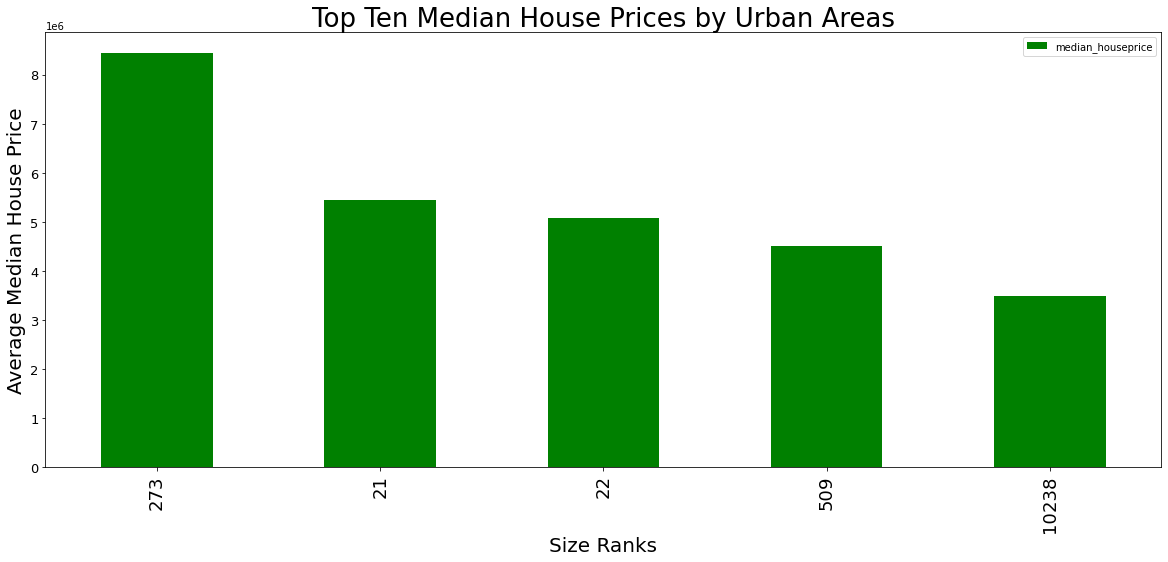

In [105]:
bar_plot(urban_housevalue)

Size Rank represents urbanization from a rank 1 with 1 being the most urbanized area.
From the plot analysis, highly urban areas do fetch high median house prices since sizeRank 273 (New York, New York) shows the highest median house 
price. Rank 21 and 22 also represent New York. Four out of the top five ranks are from New York state.
So urbanization does not affect median house prices.

### 4.2. Which cities fetch the highest median house prices?

In [106]:
# exploring top ten cities with highest house prices

houseprice_topcities = pd.DataFrame(new_df.groupby("City")["median_houseprice"].mean()
                                    .sort_values(ascending=False).head(5))

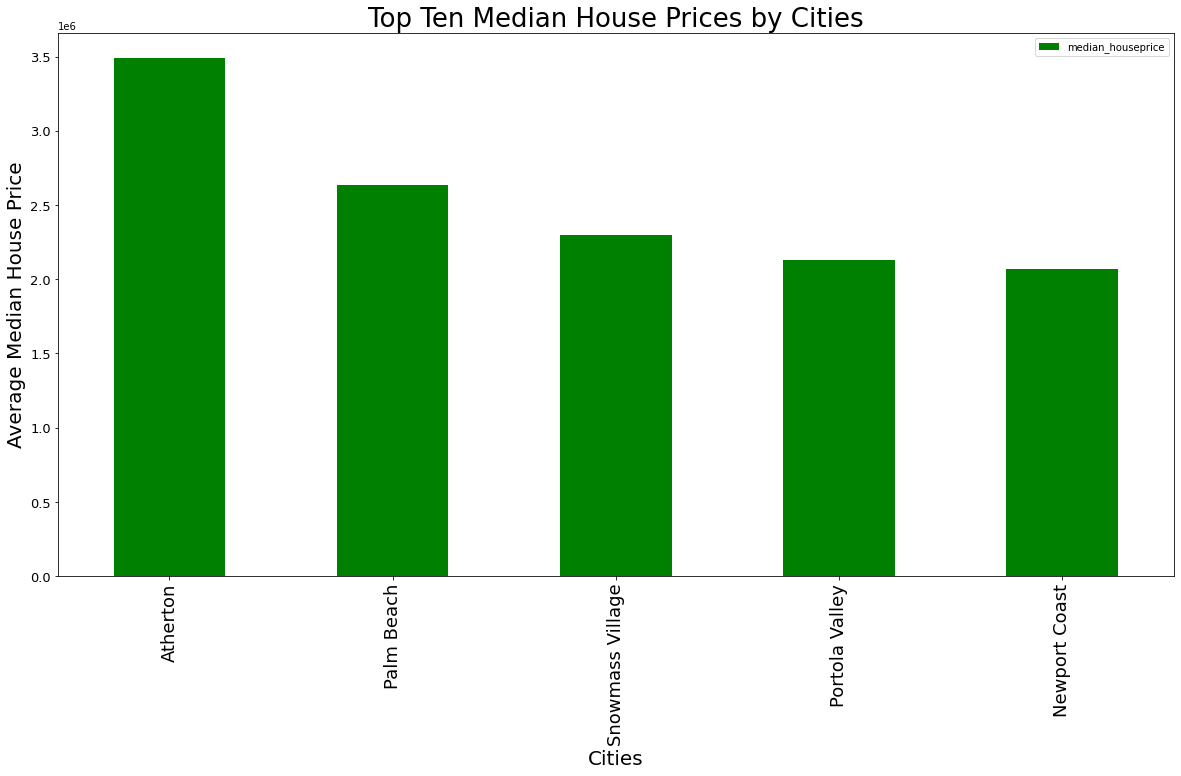

In [107]:
ax = houseprice_topcities.plot(kind='bar', figsize=(20,10), color="green", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Top Ten Median House Prices by Cities", fontsize=26)
ax.set_ylabel("Average Median House Price", fontsize=20);
ax.set_xlabel("Cities", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

The top three cities with the highest median house prices are Atherton (California), Palm Beach(Florida) and Snowmass Village
(Colorado).

### 4.3. What top 5 Zipcodes have the highest ROI?

In [108]:
ROI_topzipcodes = pd.DataFrame(df.groupby("Zipcode")["ROI"].mean().sort_values(ascending=False).head(5))


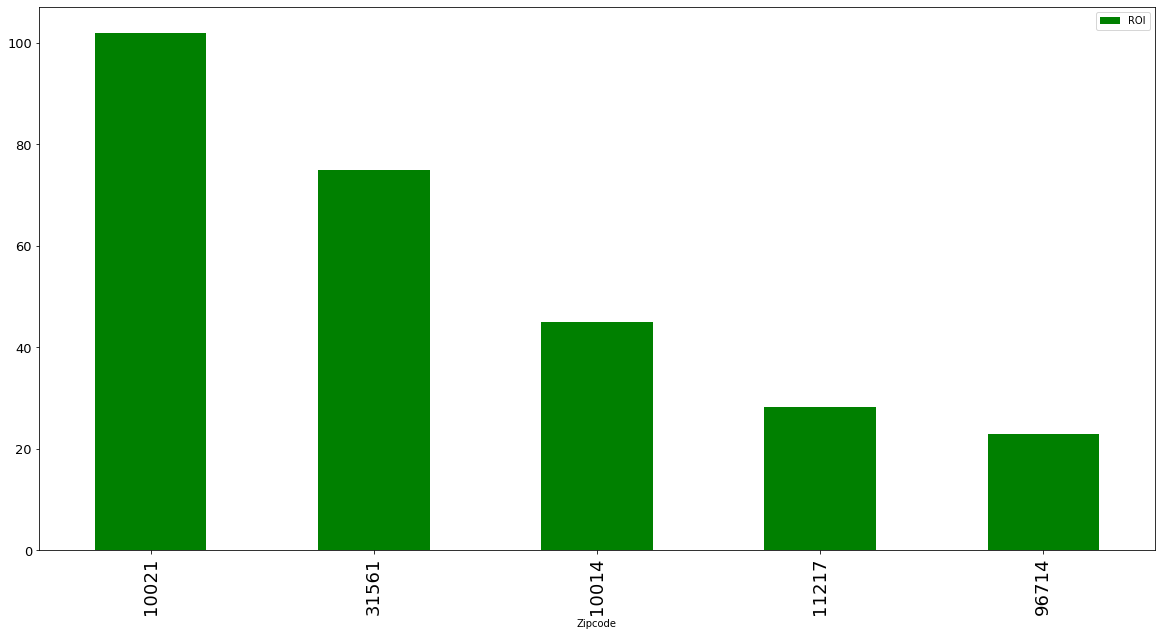

In [109]:
ROI_topzipcodes.plot(kind='bar', figsize=(20,10), color="green", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Zipcodes with the Highest ROI", fontsize=26)
ax.set_ylabel("Average ROI", fontsize=20);
ax.set_xlabel("Zipcodes", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

The zipcodes with the highest ROI are Upper East Side- New York(10021), Sea Island- Georgia State (31561), - Manhattan -New York(10014), Brooklyn
New York(11217), and Hanalei- Hawaii (96714).

From the plot, New York state has the most zipcodes with the highest ROI.

### 4.4. Which zipcodes have high price volatility?

In [110]:
CV_topzipcodes = pd.DataFrame(df.groupby("Zipcode")["CV"].mean().sort_values(ascending=False).head(5))

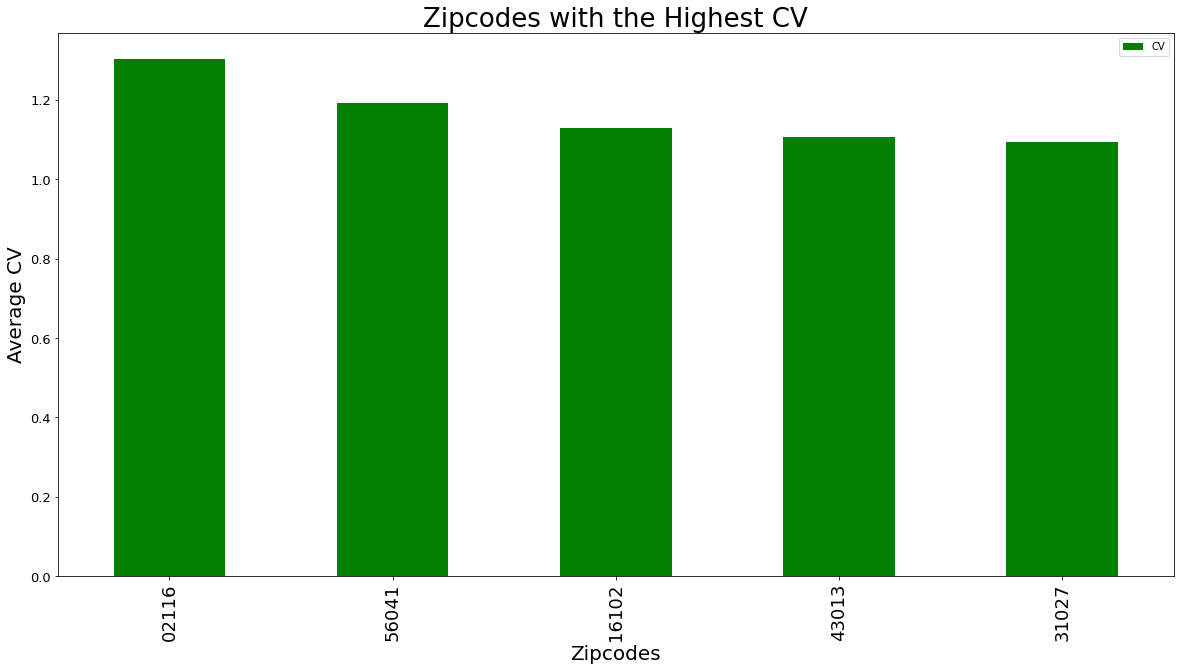

In [111]:
ax = CV_topzipcodes.plot(kind='bar', figsize=(20,10), color="green", fontsize=13);
ax.set_alpha(0.8)

ax.set_title("Zipcodes with the Highest CV", fontsize=26)
ax.set_ylabel("Average CV", fontsize=20);
ax.set_xlabel("Zipcodes", fontsize=20)
plt.xticks(fontsize= 18)
plt.savefig("output.jpg")
plt.show()

The zipcodes with the highest price volatility are:
- 02116
   Boston- Massachusetts 
- 56041
   New Ulm- Minnesota  
- 16102
   New Castle-Pennsylavia 
- 43103
   Ohio-Colombus  
- 31027
   Dublin-Georgia 
   
 This means that real estate investors cannot invest in these areas.

### 4.5 What is the trend of median houseprices over the years?

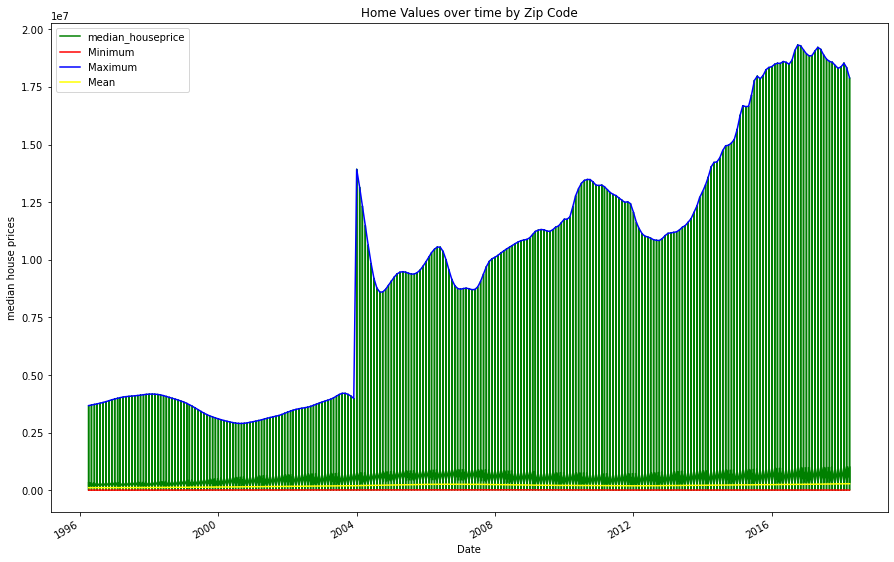

In [112]:
new_df.median_houseprice.plot(figsize=(15,10), color="green")
minimum = new_df.groupby('Date').aggregate({'median_houseprice':'min'})
maximum = new_df.groupby('Date').aggregate({'median_houseprice':'max'})
mean = new_df.groupby('Date').aggregate({'median_houseprice':'mean'})
plt.plot(minimum, color='red', label='Minimum')
plt.plot(maximum, color='blue', label='Maximum')
plt.plot(mean, color='yellow', label='Mean')
plt.legend()
plt.title('Home Values over time by Zip Code')
plt.ylabel('median house prices')
plt.show()

The lineplot above shows that there has been an increasing trend of the median house prices over the years across with a spike
in the prices after the year 2016 to 2018.

In [113]:
#new_df.resample('M', convention='end').asfreq()
resampled = new_df.resample('M', level=0).sum()

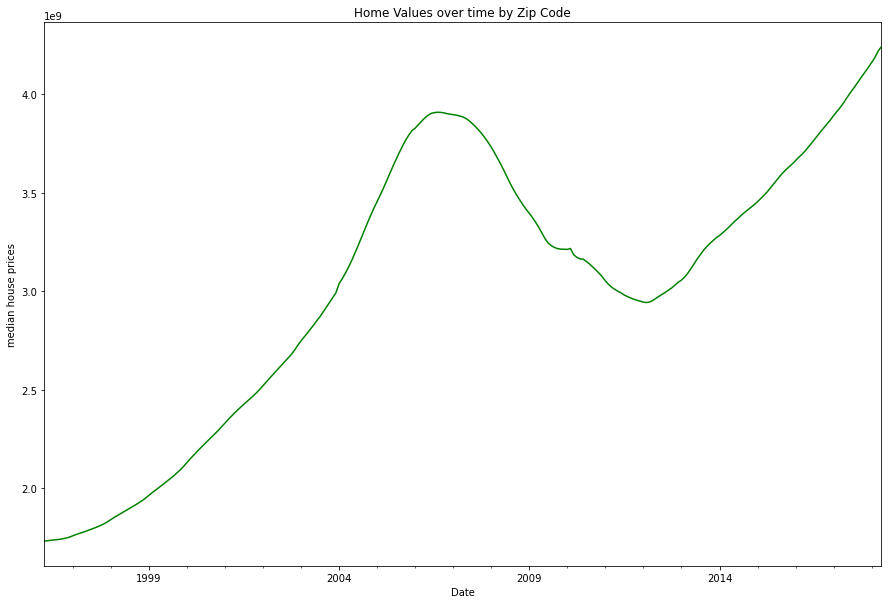

In [114]:
resampled.median_houseprice.plot(figsize=(15,10), color="green")
plt.title('Home Values over time by Zip Code')
plt.ylabel('median house prices')
plt.show()

Aside from the increasing trend, there seems to be no particular seasonality for our plot across the months. There however seems
to have been a spike around the price of houses in 2008 which can be explained by the global recession that affected the housing
market in the US

__What is the trend of the Median House prices over the years?__

In [138]:
# downsampling the data to explore the trend over the 22 years

annual_resampled = new_df.resample('A', level=0).mean()
annual_resampled.head()

,RegionID,SizeRank,ROI,CV,median_houseprice
Date,,,,,
1996-12-31,81075.010052,7362.0,1.308045,0.237317,118263.031387
1997-12-31,81075.010052,7362.0,1.308045,0.237317,121749.785200
1998-12-31,81075.010052,7362.0,1.308045,0.237317,128736.152335
1999-12-31,81075.010052,7362.0,1.308045,0.237317,138243.820326
2000-12-31,81075.010052,7362.0,1.308045,0.237317,151018.739387


Text(0.5, 0, 'Median House Prices')

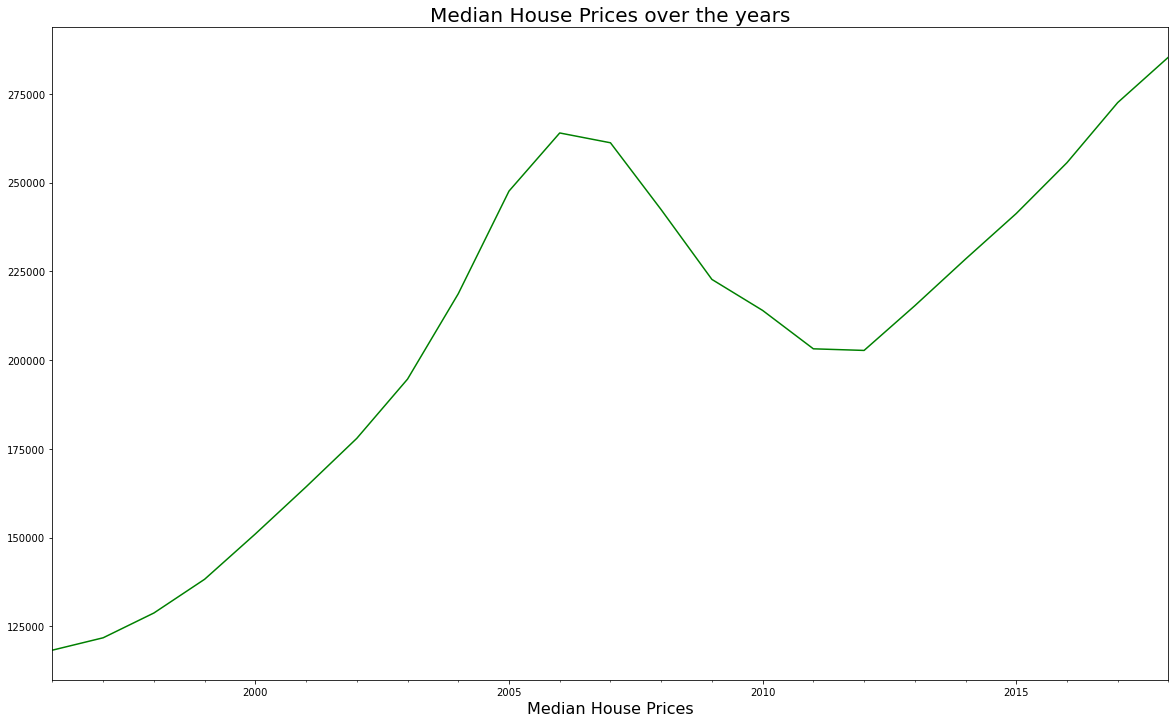

In [139]:
annual_resampled.median_houseprice.plot(figsize=(20, 12), color="green")
plt.title("Median House Prices over the years", fontsize = 20)
plt.xlabel("Years", fontsize = 16)
plt.xlabel("Median House Prices", fontsize = 16)

Since 1996, there was an increase in the median houses, however, the year 2008 and around 2016-2018 showed also a sharp spike
in the median house prices. The year 2008 can be explained by the global recession. The rise in median house prices
around 2016-2018 can be explained by the inflation spike that started in 2016 which also influenced the real estate market around
the time.

__KDE PLOT__

Text(0.5, 1.0, 'Distribution of Median House Prices')

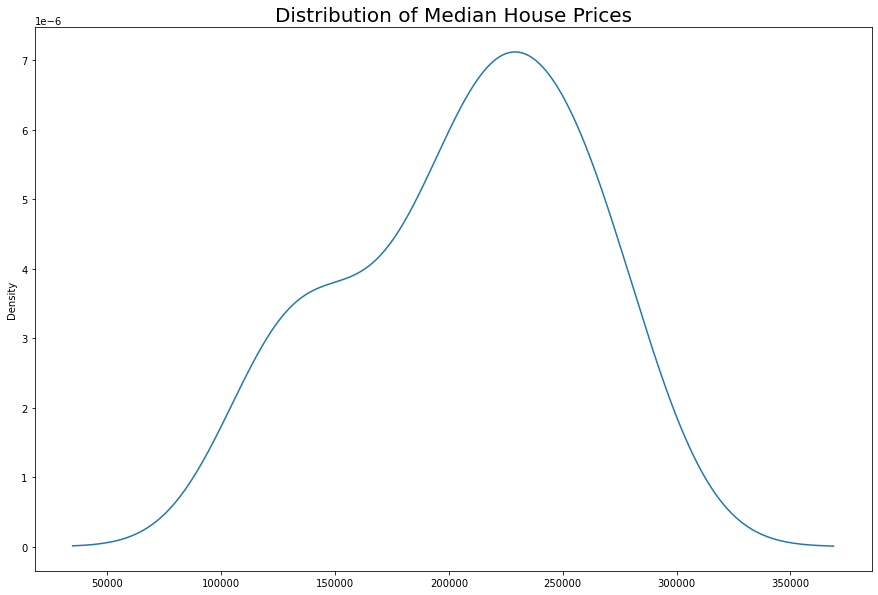

In [140]:
# exploring the distribution of median house prices over the years
annual_resampled.median_houseprice.plot(kind="kde", figsize = (15, 10));
plt.title("Distribution of Median House Prices", fontsize = 20)

The plot shows that the distribution is somewhat normal distribution.

__Checking for Outliers Using Boxplots__

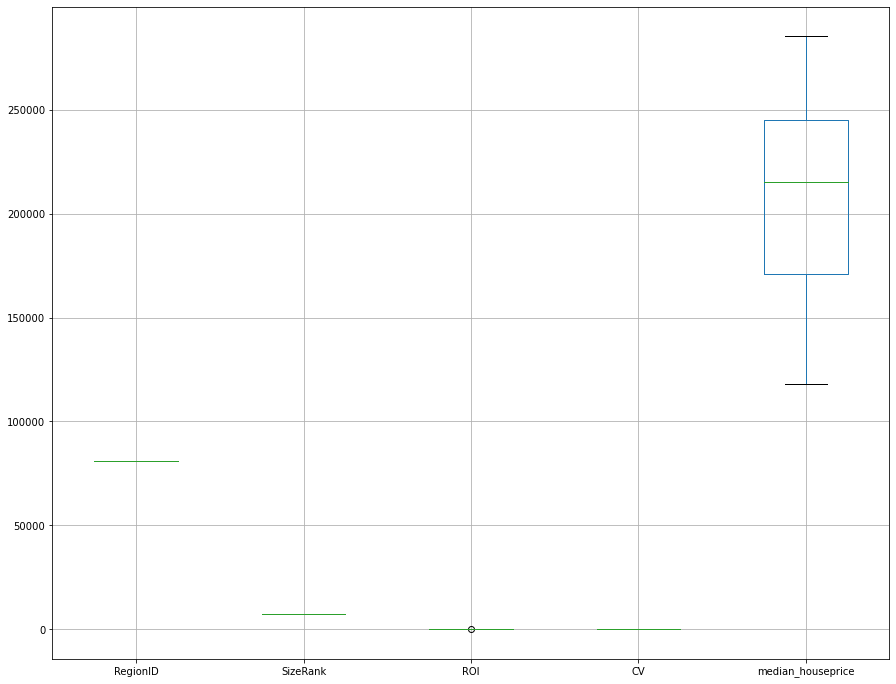

In [141]:
annual_resampled.boxplot(figsize=(15, 12));

There seems to be no outliers in this dataset.

__Heat Map__

In [145]:
# creating annual data using grouper function
median_box = annual_resampled["median_houseprice"].to_frame()


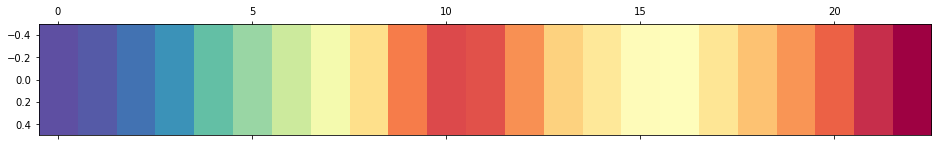

In [147]:
## Transpose the yearly group DataFrame
year_matrix = median_box.T

# Draw a heatmap with matshow()
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

The heat map shows that the cooler colors which represent lower values earlier on in the years and higher median house prices can
be seen around the period at the end of the data set (2017 and 2018) and around year 2008.